In [95]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob, os

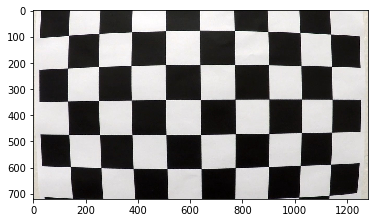

In [110]:
image = mpimg.imread('camera_cal/calibration1.jpg')
plt.imshow(image)

In [111]:
def calibrate_camera(nx = 9, ny = 6):
    """
     This functions calibrate the camera with chess board method.
     
     1. Read all the images from camera_cal
     2. Convert to gray scale
     3. find the chess board corners
     4. append the points in image points
     5. calibrate the camera and return mtx and dist
    """
    
    # Arrays to store object points and image points from all the images.
    objpoints = []  # 3d points in real world space
    imgpoints = []  # 2d points in image plane.
    
    # Prepare object point
    objp = np.zeros((nx * ny, 3), np.float32)
    objp[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)
    
    # load all the images via glob
    images = glob.glob('camera_cal/calibration*.jpg')
    
    for image_name in images:
        
        # read the image
        img = mpimg.imread(image_name)
        
        # Convert to gray scale
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    
        # if ret is true, add object points
        if ret == True:
            
            # add image points and object point.
            imgpoints.append(corners)
            objpoints.append(objp)
        else:
            print('unable to find the corners for image - ', image_name)
    
    # Calibrate the camera and return the mtx and dist
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    
    return (mtx, dist)


def undistort_image(img, mtx, dist):
    """
    This function takes in image, mtx and dist and undistort the image.
    """
    
    # undistort the image
    return cv2.undistort(img, mtx, dist, None, mtx)
    

unable to find the corners for image -  camera_cal\calibration1.jpg
unable to find the corners for image -  camera_cal\calibration4.jpg
unable to find the corners for image -  camera_cal\calibration5.jpg


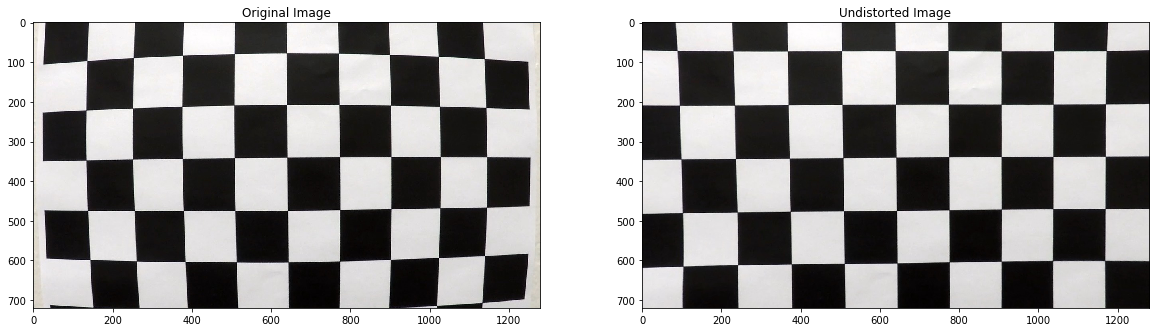

In [115]:
# Testing the undistorted image
mtx, dist = calibrate_camera()
undistorted_img = undistort_image(image, mtx, dist)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(image)
ax1.set_title('Original Image')
ax2.imshow(undistorted_img)
ax2.set_title('Undistorted Image')

plt.savefig('output_images/undistorted_image.png')

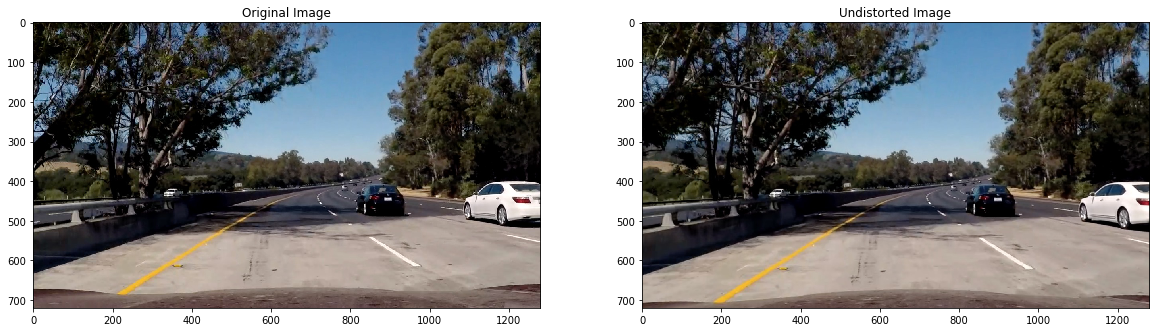

In [118]:
# Testing on the car image.
img = mpimg.imread('test_images/test5.jpg')

dst =  undistort_image(img, mtx, dist)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(img)
ax1.set_title('Original Image')
ax2.imshow(dst)
ax2.set_title('Undistorted Image')

plt.savefig('output_images/undistorted_test_image.png')